# __Titanic Survival Prediction Machine Learning Project - Gregory Mikuro__

## __1.0 Business Understanding__

### __1.1 Background and Problem Statement__

The sinking of the RMS Titanic on April 15, 1912, stands as one of the most tragic maritime disasters in history. The "unsinkable" ship met its fate after colliding with an iceberg, leading to the loss of 1502 lives out of the 2224 passengers and crew onboard. The limited number of lifeboats meant that survival was not guaranteed for everyone.

Analysis of the incident suggests that certain groups of people had a higher likelihood of survival than others. This challenge aims to leverage passenger data to unravel the factors that influenced survival rates.

### __1.2 Business Objectives__

The primary objective of this project is to develop a predictive model that can accurately identify the characteristics or profiles of passengers who were more likely to survive the Titanic disaster. By understanding these patterns, we can gain valuable insights into the social, economic, and demographic factors that played a role in survival during this historic event.

### __1.3 Data Mining Goals__

To achieve this objective, the following data mining goals are defined:

1. Data Exploration and Preparation: Thoroughly analyze and preprocess the passenger dataset, addressing missing values, outliers, and inconsistencies.
2. Feature Engineering: Create relevant features from existing data to enhance the model's predictive power (e.g., family size, social group affiliations).
3. Model Selection and Training: Evaluate various machine learning algorithms (e.g., logistic regression, random forest) to identify the most suitable model for predicting survival.
4. Model Evaluation and Validation: Rigorously assess the chosen model's performance using appropriate metrics (e.g., accuracy, precision, recall) and validation techniques.

### __1.4 Business Success Criteria__

The success of this project will be measured by the following criteria:
* Model Accuracy: The predictive model should achieve a high level of accuracy in classifying passengers as survivors or non-survivors.
* Interpretability: The model's results should be easily interpretable, providing clear insights into the factors influencing survival.
* Actionable Insights: The findings from this project should contribute to a deeper understanding of the Titanic disaster and potentially inform future safety measures in maritime travel.

## __2.0 Data Understanding__

### __2.1 Overview__

The dataset for this analysis is divided into two distinct subsets: the training set (`train.csv`) and the test set (`test.csv`). The training set is designed for building machine learning models, providing both the input features and the outcome, or "ground truth," for each passenger. These outcomes indicate whether each passenger survived the Titanic disaster, enabling the development and validation of predictive models. Key features in this dataset include passenger characteristics such as gender and class, among others. Feature engineering can be employed to create new variables that might enhance the model's predictive power.

In contrast, the test set is used to evaluate the performance of the model on unseen data. The outcomes for the passengers in this set are not provided, and it is the model's task to predict these survival outcomes. A sample submission file, `gender_submission.csv`, is also provided. This file predicts survival based solely on gender, assuming all female passengers survived and no male passengers did. This serves as a baseline for what a submission file should look like and provides a rudimentary benchmark for model performance.


### __2.2 Data Dictionary__




The variables in the dataset are defined as follows:

| Variable  | Definition                                  | Key                                                   |
|-----------|---------------------------------------------|-------------------------------------------------------|
| survival  | Survival                                    | 0 = No, 1 = Yes                                       |
| pclass    | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd                             |
| sex       | Sex                                         |                                                       |
| age       | Age in years                                |                                                       |
| sibsp     | Number of siblings/spouses aboard the Titanic |                                                       |
| parch     | Number of parents/children aboard the Titanic |                                                       |
| ticket    | Ticket number                               |                                                       |
| fare      | Passenger fare                              |                                                       |
| cabin     | Cabin number                                |                                                       |
| embarked  | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton        |


### __2.2 Variable Notes__



- **pclass**: This variable serves as a proxy for socio-economic status (SES). The classes are defined as:
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class

- **age**: The age variable is fractional for ages less than one year. If the age is estimated, it is presented in the form of xx.5.

- **sibsp**: This variable counts the number of siblings and spouses aboard the Titanic. The dataset defines family relations as:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (excluding mistresses and fiancés)

- **parch**: This variable counts the number of parents and children aboard the Titanic. Family relations are defined as:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson

- Some children traveled only with a nanny; in these cases, `parch` is set to 0.

The clear delineation and definitions of these variables are crucial for the accurate construction and interpretation of predictive models. Understanding the nuances of these variables helps in the application of appropriate feature engineering techniques, thereby potentially improving the model's performance in predicting the survival of passengers on the Titanic.

## __3.0 Data Preparation__

### __3.1 Import Libraries__

In [9]:
import pandas as pd
# import nbimporter
# import titanic_survival_project_classes

### __3.2 Data Overview__

create an extractor class with instances of importing the train and test data from data/test.csv and data/train.csv, and gives summary of statistics, describe, info, percentage of missing values of the data etc

In [10]:
import pandas as pd

class DataExtractor:
    def __init__(self, train_path, test_path):
        self.train_data = pd.read_csv(train_path)
        self.test_data = pd.read_csv(test_path)

    def summary_statistics(self, data):
        print("\n--- Summary Statistics ---")
        print(data.describe().to_markdown(numalign='left', stralign='left'))

    def describe(self, data):
        print("\n--- Data Description ---")
        print(data.describe(include='all').to_markdown(numalign='left', stralign='left'))

    def info(self, data):
        print("\n--- Data Information ---")
        print(data.info())

    def missing_percentage(self, data):
        print("\n--- Missing Values Percentage ---")
        missing_percent = (data.isnull().sum() / len(data)) * 100
        print(missing_percent.to_markdown(numalign='left', stralign='left'))


# Example Usage (replace with your actual file paths)
extractor = DataExtractor("data/train.csv", "data/test.csv")




#### __3.2.1 Training Data__

In [11]:
# print("Train Data:")
# extractor.summary_statistics(extractor.train_data)
# extractor.describe(extractor.train_data)
# extractor.info(extractor.train_data)
# extractor.missing_percentage(extractor.train_data)

__Observations__

* Based on the analysis of the train dataset, three columns have missing values - Age, Cabin and Embarked 
* There are no duplicates
* The unique values are accurate and appropriate

#### __3.2.2 Test Data__

In [12]:
# print("\nTest Data:")
# extractor.summary_statistics(extractor.test_data)
# extractor.describe(extractor.test_data)
# extractor.info(extractor.test_data)
# extractor.missing_percentage(extractor.test_data)

__Observations__

* Based on the analysis of the test dataset, three columns have missing and null values - Age, Cabin and Fare 
* There are no duplicates
* The unique values are accurate and appropriate

__Possible Strategy__
1. Drop cabin columns for both datasets because of the large number of missing values
2. Drop ticket columns for both datasets because of high number of unique values hence might not have prediction power
3. For the missing values for both datasets fare, embarked and age with imputation 
4. Break name column to create new column column for 'title'

### __3.3 Data Cleaning__

In [13]:
class DataCleaner(DataExtractor):
    # ... (rest of the class code is the same)

    def clean_data(self):
        # Drop 'Cabin' and 'Ticket' columns
        self.train_data = self.train_data.drop(['Cabin', 'Ticket'], axis=1)
        self.test_data = self.test_data.drop(['Cabin', 'Ticket'], axis=1)

        # Impute missing values (updated)
        for df in [self.train_data, self.test_data]:
            df['Fare'] = df['Fare'].fillna(df['Fare'].median())
            df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
            df['Age'] = df['Age'].fillna(df['Age'].median())

        print("Data cleaning complete!")


cleaner = DataCleaner("data/train.csv", "data/test.csv")
cleaner.clean_data()


Data cleaning complete!


In [14]:
# print("\nCleaned Train Data:")
# cleaner.summary_statistics(cleaner.train_data)
# cleaner.describe(cleaner.train_data)
# cleaner.info(cleaner.train_data)
# cleaner.missing_percentage(cleaner.train_data)

In [15]:
# print("\nCleaned Test Data:")
# cleaner.summary_statistics(cleaner.test_data)
# cleaner.describe(cleaner.test_data)
# cleaner.info(cleaner.test_data)
# cleaner.missing_percentage(cleaner.test_data)

### __3.4 Feature Engineering__

In [16]:
class FeatureEngineer(DataCleaner):
    def __init__(self, train_path, test_path):
        super().__init__(train_path, test_path)

    def engineer_features(self):
        # Extract titles and create new 'Status' column
        for df in [self.train_data, self.test_data]:
            df['Status'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
            df.drop('Name', axis=1, inplace=True)

        print("Feature engineering complete!")


In [21]:
engineer = FeatureEngineer("data/train.csv", "data/test.csv")
engineer.clean_data()  # Clean data first
engineer.engineer_features()

Data cleaning complete!
Feature engineering complete!


In [22]:
print("\nEngineered Train Data:")
engineer.summary_statistics(engineer.train_data)
engineer.describe(engineer.train_data)
engineer.info(engineer.train_data)
engineer.missing_percentage(engineer.train_data)


Engineered Train Data:

--- Summary Statistics ---
|       | PassengerId   | Survived   | Pclass   | Age     | SibSp    | Parch    | Fare    |
|:------|:--------------|:-----------|:---------|:--------|:---------|:---------|:--------|
| count | 891           | 891        | 891      | 891     | 891      | 891      | 891     |
| mean  | 446           | 0.383838   | 2.30864  | 29.3616 | 0.523008 | 0.381594 | 32.2042 |
| std   | 257.354       | 0.486592   | 0.836071 | 13.0197 | 1.10274  | 0.806057 | 49.6934 |
| min   | 1             | 0          | 1        | 0.42    | 0        | 0        | 0       |
| 25%   | 223.5         | 0          | 2        | 22      | 0        | 0        | 7.9104  |
| 50%   | 446           | 0          | 3        | 28      | 0        | 0        | 14.4542 |
| 75%   | 668.5         | 1          | 3        | 35      | 1        | 0        | 31      |
| max   | 891           | 1          | 3        | 80      | 8        | 6        | 512.329 |

--- Data Description ---
| 

In [20]:
# print("\nEngineered Test Data:")
# engineer.summary_statistics(engineer.test_data)
# engineer.describe(engineer.test_data)
# engineer.info(engineer.test_data)
# engineer.missing_percentage(engineer.test_data)

## __4.0 Exploratory Data Analysis__

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ... (Your DataExtractor, DataCleaner, and FeatureEngineer classes)

class EDA(FeatureEngineer):
    def __init__(self, train_path, test_path):
        super().__init__(train_path, test_path)

    def univariate_analysis(self, columns):
        for col in columns:
            if self.train_data[col].dtype == 'object':
                plt.figure(figsize=(12, 6))  # Increase width for more labels
                sns.countplot(data=self.train_data, x=col, order=self.train_data[col].value_counts().index)
                plt.title(f'Distribution of {col}')
                plt.xticks(rotation=45)
                plt.show()
            else:
                plt.figure(figsize=(10, 6))
                sns.histplot(self.train_data[col], kde=True)
                plt.title(f'Distribution of {col}')
                plt.show()

    def bivariate_analysis(self, columns):
        # Copy the dataframe to avoid the FutureWarning
        df_encoded = self.train_data[columns].copy()

        # Replace infinite values with NaN before calculating correlations
        df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

        # Expanded mapping for 'Status'
        mapping = {'Status': {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 4,
                             'Col': 5, 'Major': 5, 'Capt': 5, 'Don': 6, 'Sir': 6, 'Jonkheer': 6,
                             'Mme': 7, 'Ms': 7, 'Mlle': 7, 'Lady': 8, 'Countess': 8},
                   'Embarked': {'S': 0, 'C': 1, 'Q': 2},
                   'Sex': {'male': 0, 'female': 1}}

        df_encoded.replace(mapping, inplace=True)

        # Calculate correlations
        correlations = df_encoded.corr()

        # Create heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix Heatmap')
        plt.show()


# Example Usage (replace with your actual file paths)
cols_to_analyze = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 
                   'Parch', 'Fare', 'Embarked', 'Status']

eda = EDA("data/train.csv", "data/test.csv")
eda.clean_data()
eda.engineer_features()


Data cleaning complete!
Feature engineering complete!


### __4.1 Univariate Analysis__

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


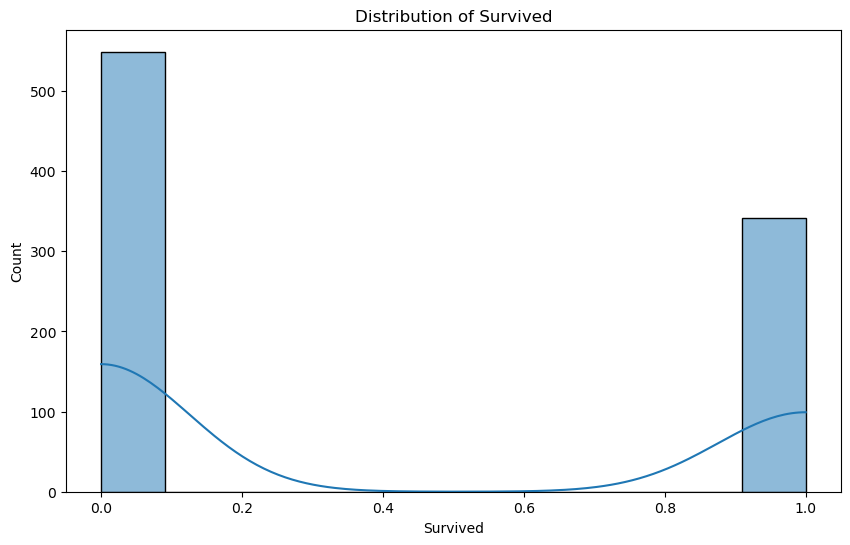

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


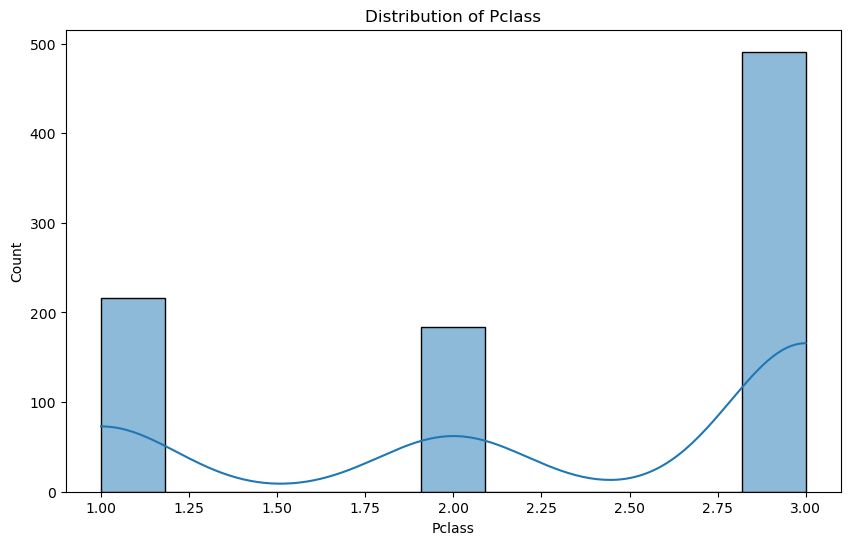

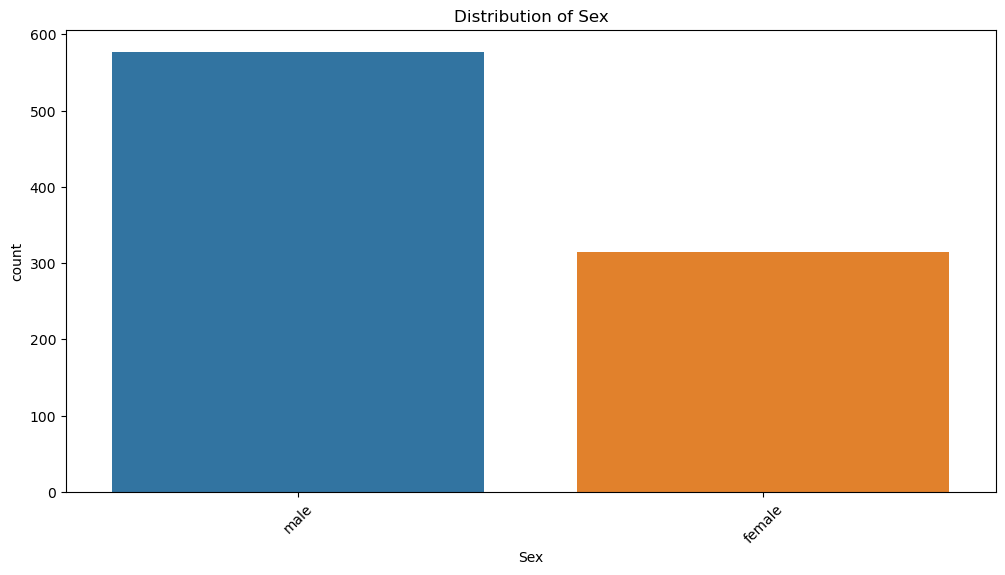

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


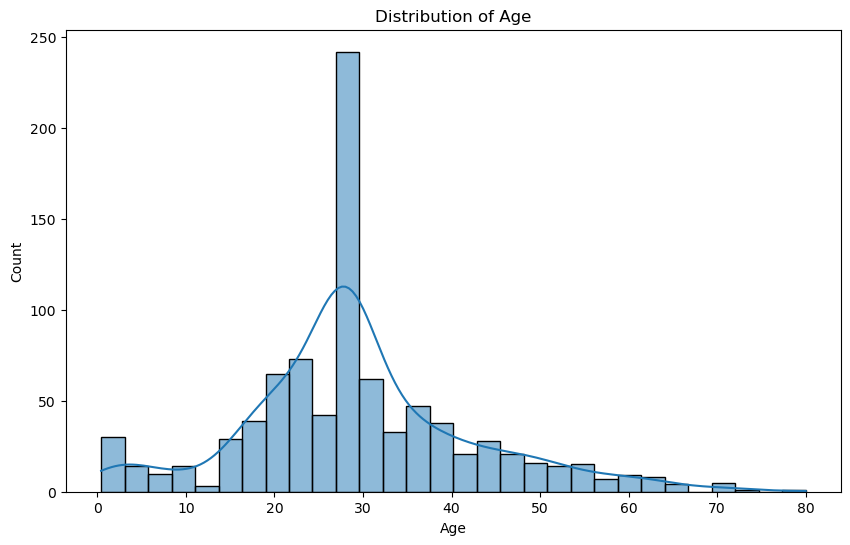

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


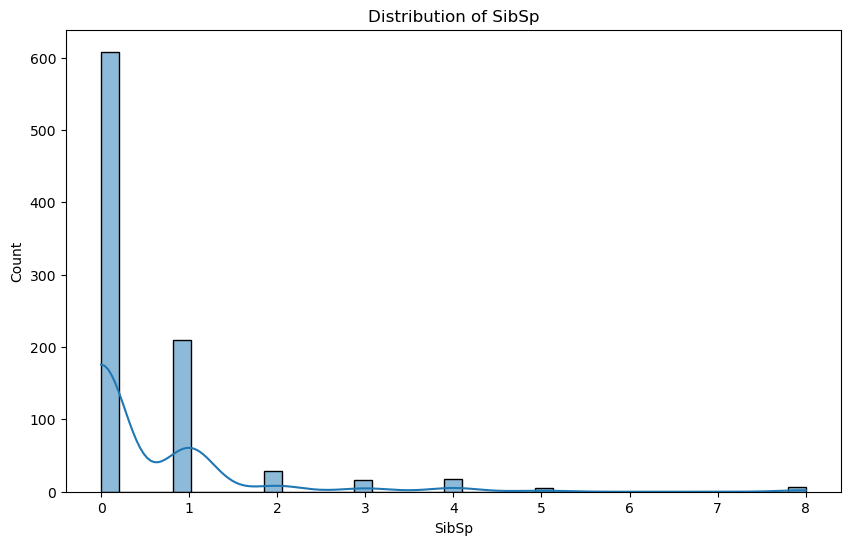

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


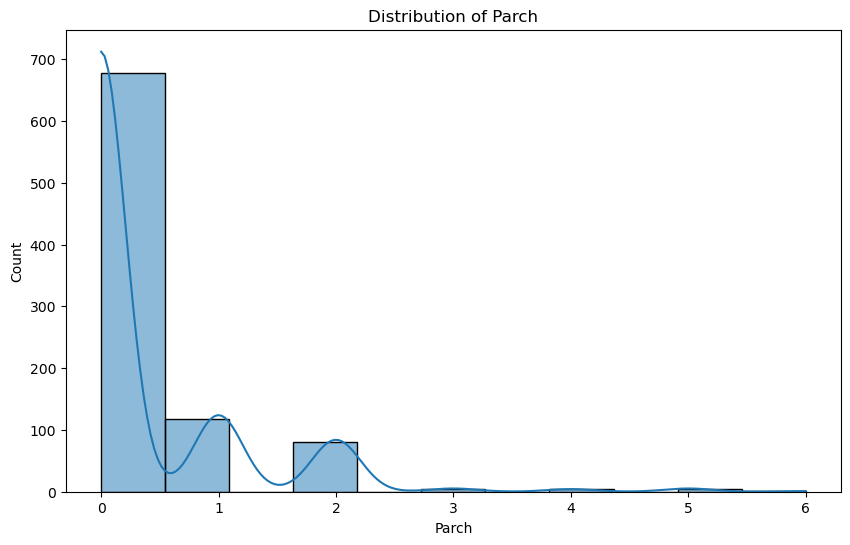

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


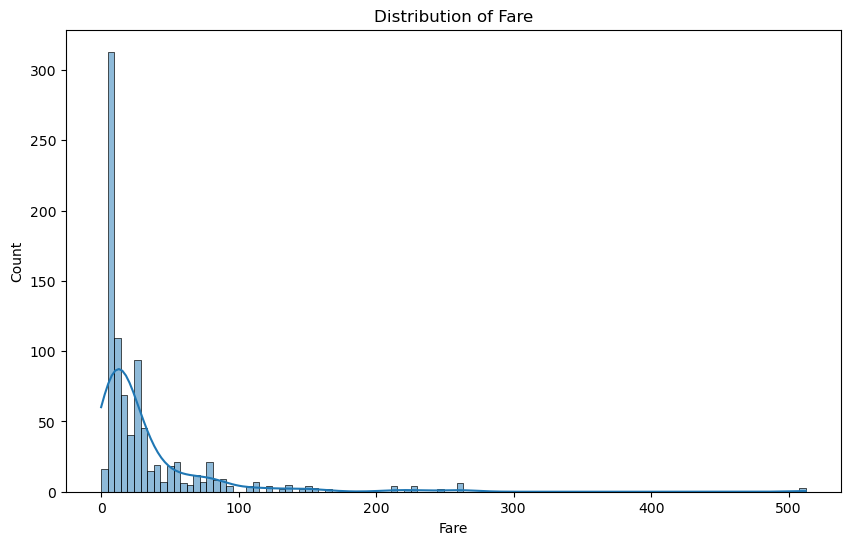

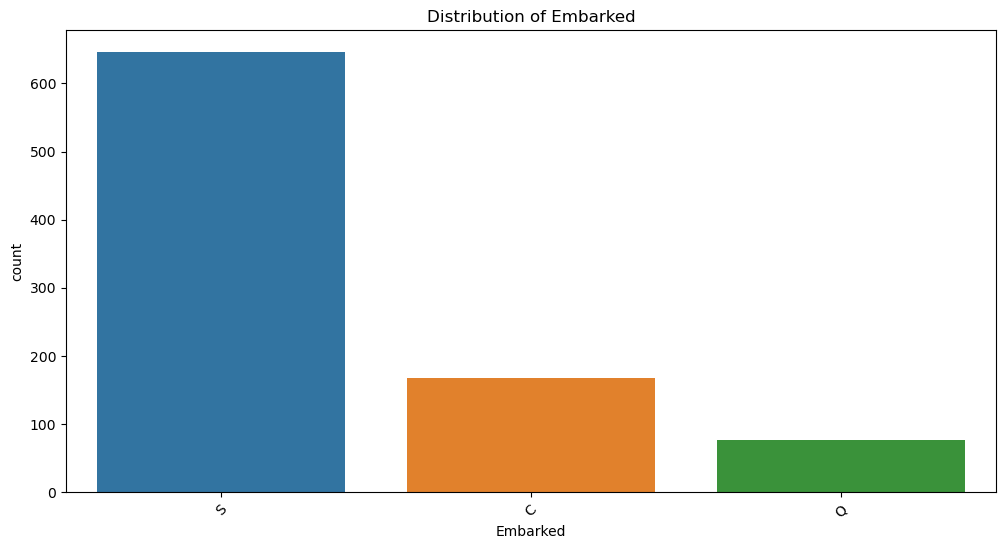

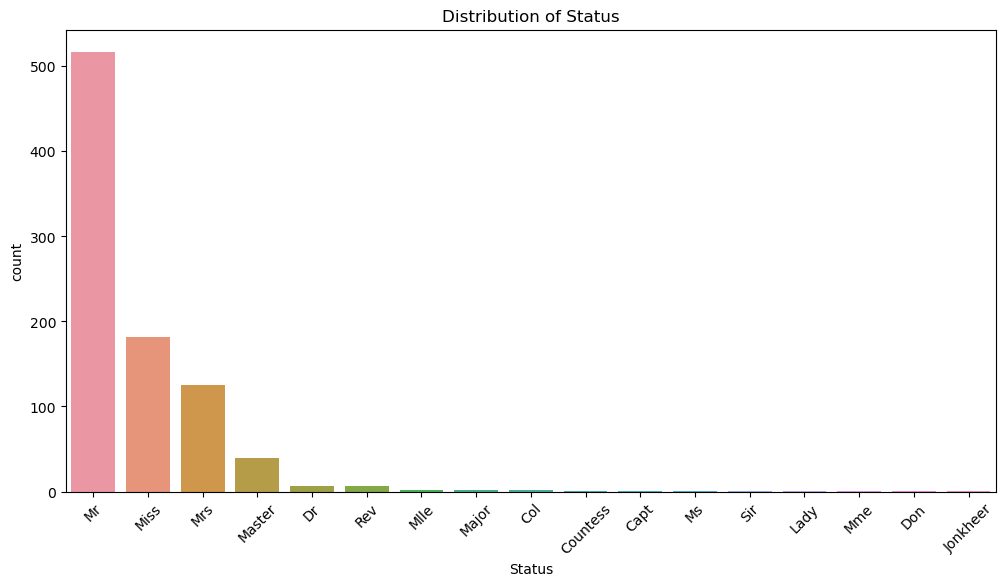

In [31]:
eda.univariate_analysis(cols_to_analyze)

### __4.2 Bivariate Analysis__

C:\Users\tonyg\AppData\Local\Temp\ipykernel_17168\492875869.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace(mapping, inplace=True)


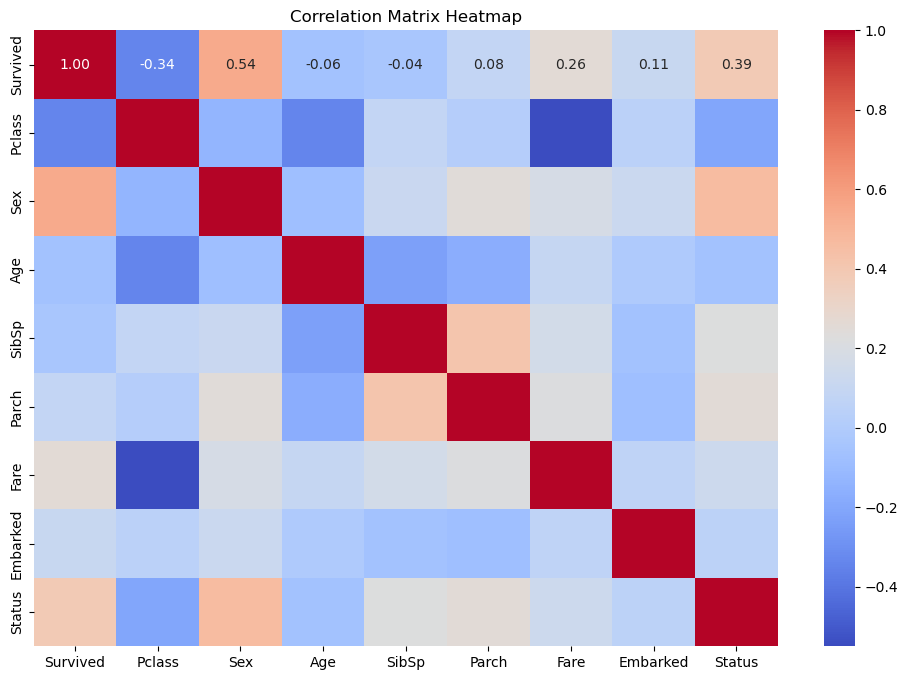

In [32]:

eda.bivariate_analysis(cols_to_analyze)

### __4.3 Multivariate Analysis__

## __5.0 Modeling__ 

### __5.1 Data Preprocessing__

#### __5.1.1 Encoding__

#### __5.1.2 Feature Selection__

##### __5.1.2.1 Correlation analysis__

##### __5.1.2.2 Variance Inflation Factor (VIF)__

#### __5.1.3 Log Transformation__

#### __5.1.4 Scaling__

#### __5.1.5 Principal Component Analysis__

## __6.0 Evaluation__

## __7.0 Deployment__

## __8.0 Conclusion__

## __9.0 Recommendation__